In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft

In [2]:
from scipy import signal

(-2.0, 2.0)

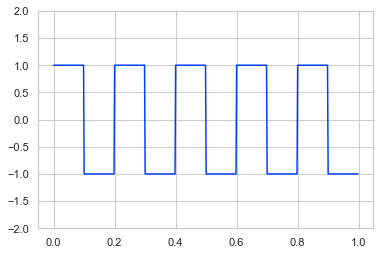

In [38]:
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

In [39]:
signal_1 = pd.DataFrame(zip(t,signal.square(2 * np.pi * 5 * t)),columns=['Time','Value'])

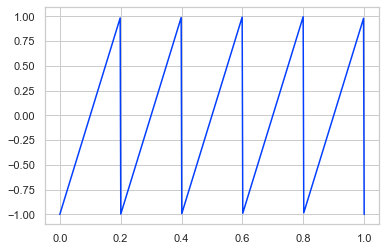

In [40]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

In [41]:
signal_2 = pd.DataFrame(zip(t,signal.sawtooth(2 * np.pi * 5 * t)),columns=['Time','Value'])

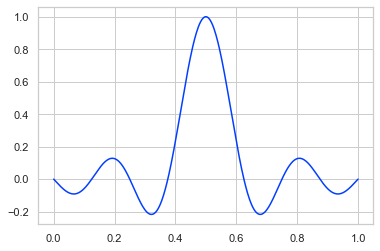

In [42]:
x = np.linspace(-4, 4, 500)
t = np.linspace(0, 1, 500)
y = np.sinc(x)
plt.plot(t,y)

In [43]:
signal_3 = pd.DataFrame(zip(t,y),columns=['Time','Value'])

In [46]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [48]:
best_gmm1 = GMM_fit(signal_1)
best_gmm2 = GMM_fit(signal_2)
best_gmm3 = GMM_fit(signal_3)

In [49]:
best_gmm1

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [50]:
best_gmm1.means_

array([[ 0.74480227,  1.        ],
       [ 0.44932137, -1.        ],
       [ 0.15335915,  1.        ],
       [ 0.84511503, -1.        ],
       [ 0.44902766,  1.        ],
       [ 0.14795611, -1.        ]])

In [52]:
best_gmm1.weights_

array([0.20308222, 0.20615224, 0.20320187, 0.19851259, 0.09371592,
       0.09533517])

In [53]:
z1,_ = best_gmm1.sample(500)

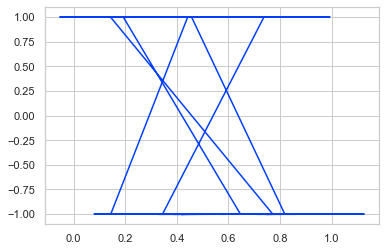

In [84]:
plt.plot(z1[:,0],z1[:,1])

In [58]:
best_gmm2

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [59]:
best_gmm2.means_

array([[ 0.80473774,  0.62625664],
       [ 0.67130403, -0.66585947],
       [ 0.26688234,  0.04367153],
       [ 0.72975823, -0.04459701],
       [ 0.33705509,  0.66110844],
       [ 0.19553821, -0.63238005]])

In [73]:
z2,_ = best_gmm2.sample(500)

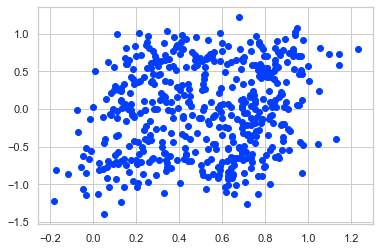

In [79]:
plt.scatter(z2[:,0],z2[:,1])

In [75]:
best_gmm3

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [76]:
best_gmm3.means_

array([[ 5.00000000e-01,  9.15892889e-01],
       [ 1.03526800e-01, -2.03363473e-04],
       [ 8.96473200e-01, -2.03363473e-04],
       [ 7.35128886e-01, -5.88038505e-02],
       [ 2.64871114e-01, -5.88038505e-02],
       [ 5.00000000e-01,  1.63579033e-01]])

In [77]:
z3,_ = best_gmm3.sample(500)

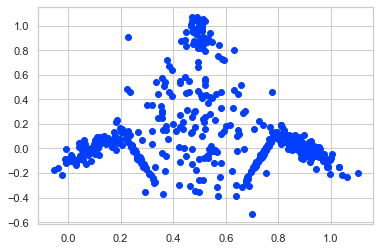

In [82]:
plt.scatter(z3[:,0],z3[:,1])